In [69]:
import numpy as np
import pandas as pd
from clusterlogs import pipeline
import nltk

In [70]:
pd.set_option('display.max_colwidth', -1)

In [71]:
df = pd.read_csv('error1109.txt')

In [72]:
df.head(10)

,src_site,dst_site,error,type
0,BelGrid-UCL,NaN,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",cms
1,UKI-SOUTHGRID-RALPP,NaN,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",cms
2,DESY-HH,UCSDT2,"srm-ifce err: Communication error on send, err: [SE][Ls][] httpg://dcache-se-cms.desy.de:8443/srm/managerv2: CGSI-gSOAP running on cmsftssrv1.fnal.gov reports could not open connection to dcache-se-cms.desy.de:8443",cms
3,DESY-HH,UCSDT2,"srm-ifce err: Communication error on send, err: [SE][Ls][] httpg://dcache-se-cms.desy.de:8443/srm/managerv2: CGSI-gSOAP running on cmsftssrv1.fnal.gov reports could not open connection to dcache-se-cms.desy.de:8443",cms
4,UCSDT2,KR-KNU-T3,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed. : open/create : [ERROR] Server responded with an error: [3021] Unable to get quota space - quota not defined or exhausted /eos/cms/store/user/chench/JetHT/C/191107_211030/0000/log/cmsRun_394.log.tar.gz; Disk quota exceeded,cms
5,KR-KNU-T3,NaN,TRANSFER globus_xio: Unable to connect to dpms29.indiacms.res.in:2811 globus_xio: System error in connect: Connection timed out globus_xio: A system call failed: Connection timed out,cms
6,CIT_CMS_T2,KR-KNU-T3,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed. : open/create : [ERROR] Server responded with an error: [3021] Unable to get quota space - quota not defined or exhausted /eos/cms/store/user/chench/JetHT/E/191107_204933/0000/log/cmsRun_679.log.tar.gz; Disk quota exceeded,cms
7,BEIJING-LCG2,NaN,TRANSFER Operation timed out,cms
8,NaN,INFN-T1,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",cms
9,DESY-HH,UCSDT2,"srm-ifce err: Communication error on send, err: [SE][Ls][] httpg://dcache-se-cms.desy.de:8443/srm/managerv2: CGSI-gSOAP running on cmsftssrv1.fnal.gov reports could not open connection to dcache-se-cms.desy.de:8443",cms


Most failing sites according to the results from Panos algorithm

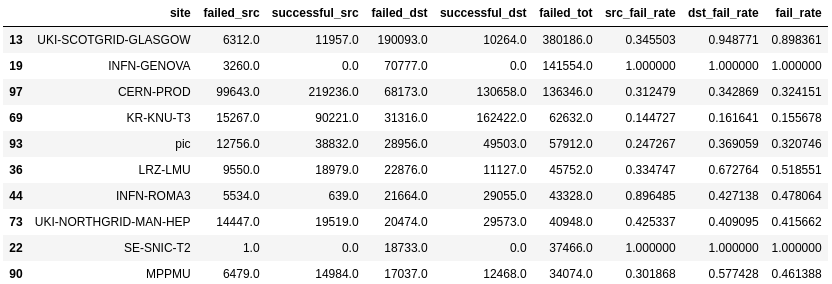

In [73]:
from IPython.display import Image
Image(filename='tot_fail.png')

Chose with a few with the biggest fail rate

In [74]:
df_krknu = df[df['src_site']=='KR-KNU-T3']
df_ucl = df[df['src_site']=='BelGrid-UCL']
print(df_krknu.shape, df_ucl.shape)

(28475, 4) (20487, 4)


In [75]:
cluster_krknu = pipeline.Chain(df_krknu, target='error', model_name='word2vec_krknu.model', mode='create')
cluster_ucl = pipeline.Chain(df_ucl, target='error', model_name='word2vec_ucl.model', mode='create')

In [76]:
cluster_krknu.process()
cluster_ucl.process()

/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sequence'] = self.tokens.tokenized_cluster
/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['tokenized_pattern'] = self.tokens.tokenized_pattern


Initial size of vocabulary: 4415
Size of vocabulary after removing tokens that appears only once: 2032
Size of vocabulary after removing rare tokens: 425
Tokenization finished


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['cleaned'] = self.tokens.detokenize(cleaned_tokens)


Found 206 equal groups
Matching Clusterization...
Finished with 109 clusters


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sequence'] = self.tokens.tokenized_cluster
/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['tokenized_pattern'] = self.tokens.tokenized_pattern


Initial size of vocabulary: 545
Size of vocabulary after removing tokens that appears only once: 280
Size of vocabulary after removing rare tokens: 192
Tokenization finished


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['cleaned'] = self.tokens.detokenize(cleaned_tokens)


Found 64 equal groups
Matching Clusterization...
Finished with 40 clusters


Separating clusters containing fewer than 3 messages

In [77]:
clusters_krknu, outliers_krknu = cluster_krknu.split_clusters(cluster_krknu.result, 'cluster_size', threshold=3)
clusters_ucl, outliers_ucl = cluster_ucl.split_clusters(cluster_ucl.result, 'cluster_size', threshold=3)


Top 10 clusters by the size of cluster in each group

In [78]:
#KR-KNU-T3
top_numb = 10
top_clusters_krknu = cluster_krknu.validation(clusters_krknu)[['cluster_size','pattern','mean_similarity']].sort_values(by=["cluster_size"], ascending=False) #clusters sorted by similarity inside the cluster
top_clusters_krknu.head(top_numb)

,cluster_size,pattern,mean_similarity
0,6327,｟*｠ globus_ftp_client: the server responded with an error 421 Service busy: Connection limit exceeded. Please try again later. Closing control connection.,0.93
1,5119,｟*｠ globus_xio: Unable to connect to｟*｠:2811 globus_xio: System error in connect: Connection｟*｠ globus_xio: A system call failed: Connection｟*｠,0.80
2,3862,"globus_ftp_client: the server responded with an error 530 530-globus_xio: Authentication Error 530-OpenSSL Error: s3_srvr.c:3327: in library: SSL routines, function ssl3_get_client_certificate: certificate verify failed 530-globus_gsi_callback_module: Could not verify credential 530-globus_gsi_callback_module: The certificate has expired: Credential with subject: /DC=ch/DC=cern/OU=Organic Units/OU=Users/CN=｟*｠/CN=｟*｠/CN=｟*｠/CN=｟*｠/CN=｟*｠/CN=｟*｠ has expired. 530｟*｠.",0.93
3,3314,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed. : open/create : [ERROR] Server responded with an error: [3021] Unable to get quota space - quota not defined or exhausted /eos/cms/store/user/fengwang/crab_2019-10-29_MuMuTauTauLimits_HybridNew_v1/mmmt_mm_h_parametric_unbinned_lowmassWith1DFitsDoubleExpo/｟*｠/｟*｠/Combine/crab_2019-10-29_MuMuTauTauLimits_HybridNew_v1/｟*｠/0000/｟*｠; Disk quota exceeded,0.98
4,3184,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed. : open/create : [ERROR] Server responded with an error: [3021] Unable to get quota space - quota not defined or exhausted /eos/｟*｠/store/user/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠; Disk quota exceeded,0.71
5,1472,"｟*｠ srm-ifce err: Communication error on send, err: [SE][｟*｠][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data header: Connection｟*｠",0.76
6,927,TRANSFER Operation timed out,1.00
7,864,globus_ftp_client: the server responded with an error 530 530-Login incorrect. : globus_gss_assist: Error invoking callout 530-globus_callout_module: The callout returned an error 530-an unknown error occurred 530 End.,1.00
8,521,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",1.00
9,468,｟*｠ globus_xio: System error in recv: Connection reset by peer globus_xio: A system call failed: Connection reset by peer,0.88


In [79]:
#BelGrid-UCL
top_clusters_ucl = cluster_ucl.validation(clusters_ucl)[['cluster_size','pattern','mean_similarity']].sort_values(by=["cluster_size"], ascending=False) #clusters sorted by similarity inside the cluster
top_clusters_ucl.head(top_numb)

,cluster_size,pattern,mean_similarity
0,11336,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",1.00
1,4918,TRANSFER an end-of-file was reached globus_xio: An end of file occurred,1.00
2,1312,SOURCE CHECKSUM an end-of-file was reached globus_xio: An end of file occurred,1.00
3,1060,Destination file exists and overwrite is not enabled,1.00
4,568,TRANSFER Operation timed out,1.00
5,481,TRANSFER globus_xio: System error in recv: Connection timed out globus_xio: A system call failed: Connection timed out,1.00
6,307,｟*｠ globus_xio: System error in recv: Connection reset by peer globus_xio: A system call failed: Connection reset by peer,0.95
7,188,"TRANSFER globus_ftp_client: the server responded with an error 451 451-GlobusError: v=1 c=INTERNAL_ERROR 451-GridFTP-Errno: 255 451-GridFTP-Reason: System error in write into HDFS (host=｟*｠, user=｟*｠, path=/store/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠) 451-GridFTP-Error-String: Unknown error 255 451 End.",0.78
8,107,"｟*｠ srm-ifce err: Communication error on send, err: [SE][｟*｠][] httpg:/dcache-se-cms.desy.de:8443/srm/managerv2: CGSI-gSOAP running on t3serv019.mit.edu reports could not open connection to dcache-se-cms.desy.de:8443",0.96
9,52,｟*｠ globus_xio: Unable to connect to｟*｠:2811 globus_xio: System error in connect: Connection timed out globus_xio: A system call failed: Connection timed out,0.87


Most inaccurate clusters

In [80]:
#KR-KNU-T3
top_clusters_krknu[['cluster_size','pattern','mean_similarity']].sort_values(by=["mean_similarity"]).head(5)

,cluster_size,pattern,mean_similarity
4,3184,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed. : open/create : [ERROR] Server responded with an error: [3021] Unable to get quota space - quota not defined or exhausted /eos/｟*｠/store/user/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠; Disk quota exceeded,0.71
5,1472,"｟*｠ srm-ifce err: Communication error on send, err: [SE][｟*｠][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data header: Connection｟*｠",0.76
19,91,TRANSFER globus_ftp_client: the server responded with an error 500 500-Command failed. : globus_xio: System error in｟*｠: Connection timed out 500-globus_xio: A system call failed: Connection timed out 500 End.,0.77
1,5119,｟*｠ globus_xio: Unable to connect to｟*｠:2811 globus_xio: System error in connect: Connection｟*｠ globus_xio: A system call failed: Connection｟*｠,0.80
29,29,DESTINATION SRM_PUTDONE call to srm_ifce error: [SE][PutDone][] httpg:/｟*｠:8443/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data header: Connection｟*｠,0.82


In [81]:
#BelGrid-UCL
top_clusters_ucl[['cluster_size','pattern','mean_similarity']].sort_values(by=["mean_similarity"]).head(5)

,cluster_size,pattern,mean_similarity
7,188,"TRANSFER globus_ftp_client: the server responded with an error 451 451-GlobusError: v=1 c=INTERNAL_ERROR 451-GridFTP-Errno: 255 451-GridFTP-Reason: System error in write into HDFS (host=｟*｠, user=｟*｠, path=/store/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠) 451-GridFTP-Error-String: Unknown error 255 451 End.",0.78
9,52,｟*｠ globus_xio: Unable to connect to｟*｠:2811 globus_xio: System error in connect: Connection timed out globus_xio: A system call failed: Connection timed out,0.87
12,14,"DESTINATION EXISTS Destination already exist gsiftp:/eoscmsftp.cern.ch/eos/cms/store/mc/RunIISummer19UL18wmLHEGEN/｟*｠/｟*｠/106X_upgrade2018_realistic_v4-v1/｟*｠/｟*｠, Cancel",0.89
23,3,TRANSFER CHECKSUM MISMATCH User defined checksum and destination checksums do not match｟*｠ !=｟*｠,0.91
25,3,TRANSFER globus_ftp_client: the server responded with an error 500 500-Command failed. : callback failed. 500-globus_xio: System error in｟*｠:｟*｠ 500-globus_xio: A system call failed:｟*｠ 500 End.,0.91


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer 
patt = [' '.join(list(clusters_krknu['pattern'])), ' '.join(list(clusters_ucl['pattern']))]

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 

tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(patt)

first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)


,tfidf
error,0.416260
globus_xio,0.215838
connection,0.215838
transfer,0.200421
se,0.200421
...,...
globus_gsi_callback_module,0.000000
globus_gss_assist,0.000000
gr,0.000000
grid02,0.000000


In [41]:
clusters_krknu['pattern'].values

array(['｟*｠ globus_ftp_client: the server responded with an error 421 Service busy: Connection limit exceeded. Please try again later. Closing control connection.',
       '｟*｠ globus_xio: Unable to connect to｟*｠:2811 globus_xio: System error in connect: Connection｟*｠ globus_xio: A system call failed: Connection｟*｠',
       'globus_ftp_client: the server responded with an error 530 530-globus_xio: Authentication Error 530-OpenSSL Error: s3_srvr.c:3327: in library: SSL routines, function ssl3_get_client_certificate: certificate verify failed 530-globus_gsi_callback_module: Could not verify credential 530-globus_gsi_callback_module: The certificate has expired: Credential with subject: /DC=ch/DC=cern/OU=Organic Units/OU=Users/CN=｟*｠/CN=｟*｠/CN=｟*｠/CN=｟*｠/CN=｟*｠/CN=｟*｠ has expired. 530｟*｠.',
       'TRANSFER globus_ftp_client: the server responded with an error 500 Command failed. : open/create : [ERROR] Server responded with an error: [3021] Unable to get quota space - quota not defined o

In [42]:
clusters_ucl['pattern'].values

array(['TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred',
       'TRANSFER an end-of-file was reached globus_xio: An end of file occurred',
       'SOURCE CHECKSUM an end-of-file was reached globus_xio: An end of file occurred',
       'Destination file exists and overwrite is not enabled',
       'TRANSFER Operation timed out',
       'TRANSFER globus_xio: System error in recv: Connection timed out globus_xio: A system call failed: Connection timed out',
       '｟*｠ globus_xio: System error in recv: Connection reset by peer globus_xio: A system call failed: Connection reset by peer',
       'TRANSFER globus_ftp_client: the server responded with an error 451 451-GlobusError: v=1 c=INTERNAL_ERROR 451-GridFTP-Errno: 255 451-GridFTP-Reason: System error in write into HDFS (host=｟*｠, user=｟*｠, path=/store/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠) 451-GridFTP-Error-St

In [44]:
np.intersect1d(clusters_krknu['pattern'].values,clusters_ucl['pattern'].values)

array(['DESTINATION SRM_PUTDONE call to srm_ifce error: [SE][PutDone][] httpg:/dcache-se-cms.desy.de:8443/srm/managerv2: CGSI-gSOAP running on t3serv019.mit.edu reports could not open connection to dcache-se-cms.desy.de:8443',
       'Destination file exists and overwrite is not enabled',
       'TRANSFER CHECKSUM MISMATCH User defined checksum and destination checksums do not match｟*｠ !=｟*｠',
       'TRANSFER Operation canceled from gfal2_cancel',
       'TRANSFER Operation timed out',
       'TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred',
       'TRANSFER an end-of-file was reached globus_xio: An end of file occurred',
       'TRANSFER globus_xio: System error in recv: Connection timed out globus_xio: A system call failed: Connection timed out',
       '｟*｠ globus_xio: System error in recv: Connection reset by peer globus_xio: A system call fail